<a href="https://colab.research.google.com/github/purushothamareddyj/Data_visualization/blob/Data_visulization_Case_study/Case_study_Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/drive/MyDrive/Case Study Notebook/googleplaystore_v2.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
# to check the how many null values
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [6]:
# Drop the Null records

dt1=df[~df.Rating.isnull()]
dt1.shape

(9367, 13)

In [7]:
# check weather any null values present in Ratings column
dt1.Rating.isnull().sum()

0

In [8]:
# check weather any null values present in any column
dt1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


In [9]:
# Explore/Understand the null values fro the column " Android ver"
dt1[dt1['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# Highlight the Value by qulify method
dt1[(dt1['Android Ver'].isnull() & (dt1.Category =='1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
#To Exculde or Drop the particuler record
dt1= dt1[~(dt1['Android Ver'].isnull() & (dt1.Category =='1.9'))]

In [14]:
#to checck whether record is droped r not
dt1[dt1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [16]:
# replace the missing Values with most repeating values in Android Version
dt1['Android Ver'].value_counts()

#4.1 an dup is most repating values
dt1['Android Ver'].mode()[0]

'4.1 and up'

In [17]:
# Fill the NANs with repated Values
dt1['Android Ver']=dt1['Android Ver'].fillna(dt1['Android Ver'].mode()[0])

In [18]:
# to recheck the values added r not
dt1['Android Ver'].value_counts()

,count
Android Ver,
4.1 and up,2061
Varies with device,1319
4.0.3 and up,1240
4.0 and up,1131
4.4 and up,875
2.3 and up,582
5.0 and up,535
4.2 and up,338
2.3.3 and up,240


In [20]:
# to checck the null vales present r not
dt1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [32]:
dt1[dt1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [33]:
# Replace the most repating number in  the currect ver
dt1['Current Ver'].value_counts()

#To get the 1 string in the current ver
dt1['Current Ver'].mode()[0]

'Varies with device'

In [35]:
# fill the NANs with the Varies with count numbers
dt1['Current Ver']=dt1['Current Ver'].fillna(dt1['Current Ver'].mode()[0])

In [36]:
dt1['Current Ver'].value_counts()

,count
Current Ver,
Varies with device,1419
1.0,458
1.1,195
1.2,126
1.3,120
...,...
2.9.10,1
3.18.5,1
1.3.A.2.9,1


In [37]:
# check the null values
dt1['Current Ver'].isnull().sum()

0

In [38]:
dt1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


**Change the variable to crrect type**

In [40]:
dt1.dtypes
dt1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
# negalct the $ symbol and starts with 0 and convert to the Float
#dt1.Price= dt1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))
dt1.Price= dt1.Price.apply(lambda x:0.0 if x=="0" else float(x[1:]) if isinstance(x, str) and x.startswith('$') else float(x) if isinstance(x, (int, float)) else x )
dt1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,float64
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [55]:
# Price column
dt1.Price.value_counts()

,count
Price,
0.00,8719
2.99,114
0.99,107
4.99,70
1.99,59
...,...
1.29,1
299.99,1
379.99,1


In [60]:
# handel with review column
dt1.Reviews.value_counts()

# Convert the Object in to the Integer
dt1.Reviews=dt1.Reviews.astype('int32')
dt1.dtypes
dt1.describe()

,Rating,Reviews,Size,Price
count,9366.000000,9.366000e+03,9366.000000,9366.000000
mean,4.191757,5.140498e+05,22705.733753,0.960928
std,0.515219,3.144042e+06,21305.040123,15.816585
min,1.000000,1.000000e+00,8.500000,0.000000
25%,4.000000,1.862500e+02,6600.000000,0.000000
50%,4.300000,5.930500e+03,21000.000000,0.000000
75%,4.500000,8.153275e+04,27000.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,400.000000


In [62]:
dt1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [64]:
# Installs Columns
dt1.Installs.value_counts()
dt1.dtypes



,0
App,object
Category,object
Rating,float64
Reviews,int32
Size,float64
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [65]:
# We need to remove the ',' and '+' in the Install columns and Convert in to the Integer
dt1.Installs=dt1.Installs.apply(lambda x: x.replace(',',''))
dt1.Installs=dt1.Installs.apply(lambda x: x.replace('+',''))
dt1.Installs

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
...,...
10834,500
10836,5000
10837,100
10839,1000


In [70]:
dt1.describe()
dt1.Installs.value_counts()

# Converting to the Integer
dt1.Installs=dt1.Installs.astype('int32')
dt1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int32
Size,float64
Installs,int32
Type,object
Price,float64
Content Rating,object
Genres,object


In [71]:
dt1.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


**Sanity Checks**

In [74]:
# Ratings is b/w 1 to 5 for all the apps
dt1.Rating.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [75]:
# No. of reviews is Less than OR Equal to the No. of Installs
dt1[dt1.Reviews>dt1.Installs].shape

(7, 13)

In [76]:
dt1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [78]:
# Reviews <= Installs
dt1= dt1[dt1.Reviews<=dt1.Installs]

In [80]:
# Free apps should not have price grater than zero
dt1[(dt1.Price>0) & (dt1.Type=='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [82]:
#IQR for the Price Column with box plot
Q1=dt1.Price.quantile(0.25)
Q3=dt1.Price.quantile(0.75)
IQR=Q3-Q1
IQR


0.0

In [83]:
dt1.Price.describe()

,Price
count,9359.000000
mean,0.961116
std,15.822478
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


**Identifying and handling Outliers/Extreme Values**

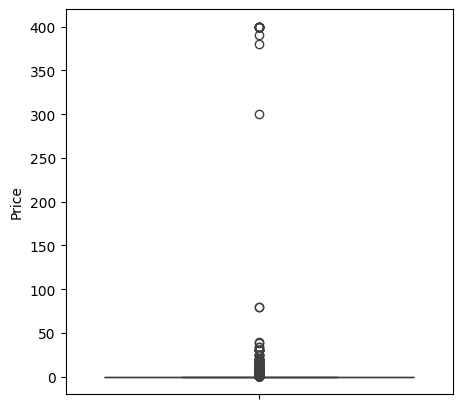

In [87]:
plt.figure(figsize=(5,5))
sns.boxplot(dt1.Price)
plt.show()

In [92]:
# Check the price which is more than 200
dt1[dt1.Price>200]

# By analysing the records & remove the junk apps which is more than 200$
dt1=dt1[dt1.Price<200]
dt1.Price.describe()

,Price
count,9344.000000
mean,0.334463
std,2.169925
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,79.990000


<Axes: >

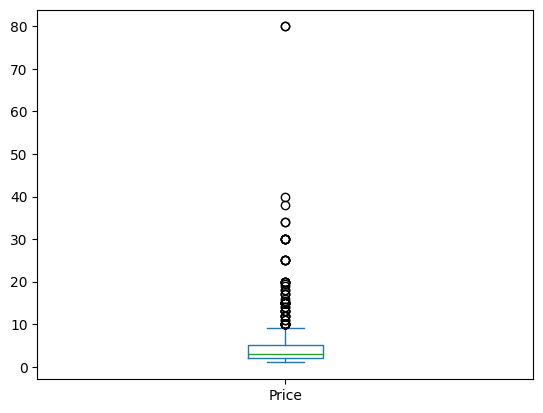

In [94]:
# Boxplot more than 0
dt1[dt1.Price>0].Price.plot.box()

In [96]:
# records > 30
dt1[dt1.Price>30]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [99]:
# plot the Boxplot now on price > 30 Remove records
dt1=dt1[dt1.Price<=30]
dt1.shape


(9338, 13)

**HistoGram OR HistPlot**

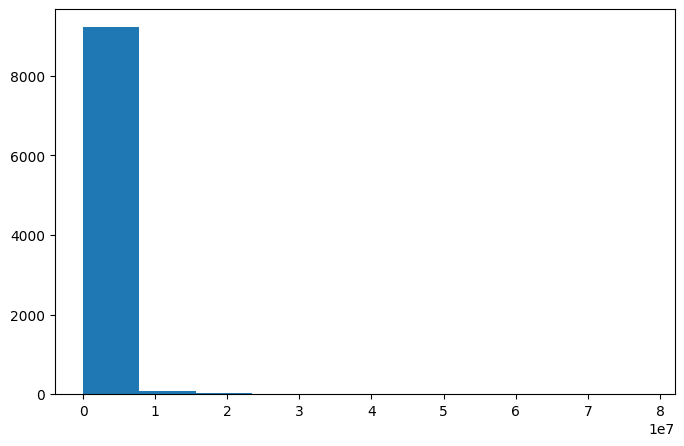

In [101]:
# histogram for review
plt.figure(figsize=(8,5))
plt.hist(dt1.Reviews)
plt.show()

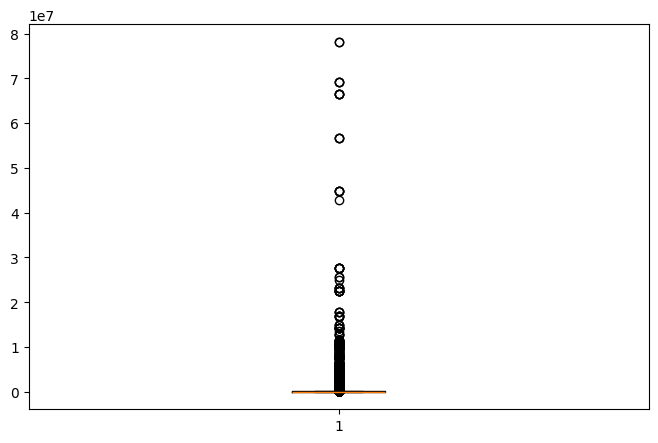

In [102]:
# boxplot for review
plt.figure(figsize=(8,5))
plt.boxplot(dt1.Reviews)
plt.show()

In [104]:
# check the records having more than 10M reviews
dt1[dt1.Reviews>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [106]:
# Drop the records having more than 10M
dt1=dt1[dt1.Reviews<=1000000]
dt1.shape

(8634, 13)

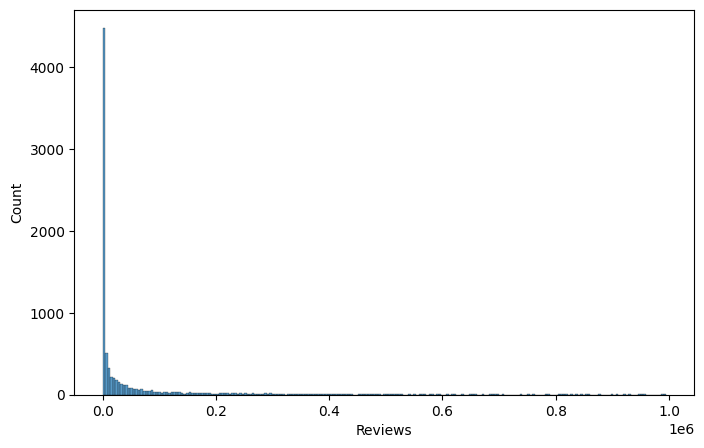

In [107]:
# histplo for review
plt.figure(figsize=(8,5))
sns.histplot(dt1.Reviews)
plt.show()

In [110]:
dt1.Installs.describe()

# IQR for Install
Q1=dt1.Installs.quantile(0.25)
Q3=dt1.Installs.quantile(0.75)
IQR=Q3-Q1
IQR


990000.0

In [111]:
# Drop the records, Install more than 100 million
dt1=dt1[dt1.Installs<=100000000]
dt1.shape

(8624, 13)

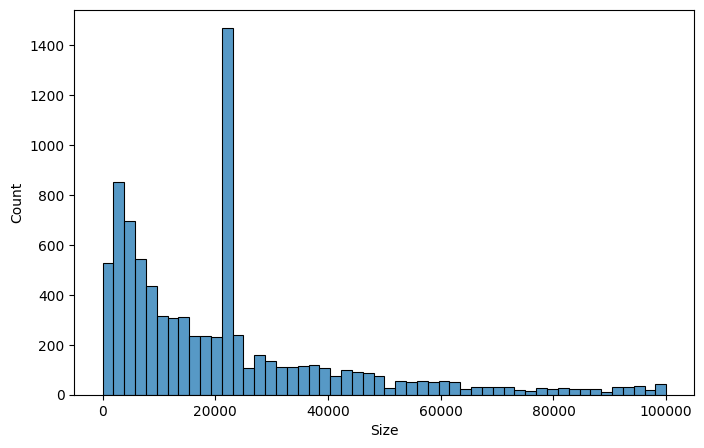

18000.0

In [113]:
# histplot for size column
plt.figure(figsize=(8,5))
sns.histplot(dt1.Size)
plt.show()

# median for size column
dt1.Size.median()